In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-07-23 23:35:21.981462: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 23:35:22.145711: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 23:35:22.332469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 23:35:22.494064: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 23:35:22.536068: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 23:35:22.834811: I tensorflow/core/platform/cpu_feature_gu

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
data_dir = './datasets/flower_photos'
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/3954167682_128398bf79_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7267547016_c8903920bf.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8011324555_375b7b5b0a.jpg'),
 PosixPath('datasets/flower_photos/dandelion/13652698934_d258a6ee8c.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14829055_2a2e646a8f_m.jpg')]

In [7]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [8]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg')]

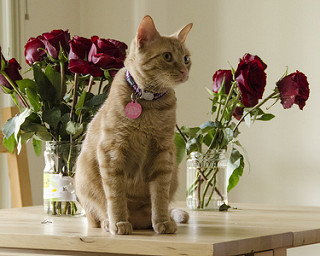

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

`flowers_images_dict.items()` <-- ('roses', [PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'), PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),])<br>

`flower_name` <-- 'roses'<br>
`images` <-- [PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'), PosixPath('datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),]

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/withOutDataAugmentation", histogram_freq=1)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10,callbacks=[tb_callback])

Epoch 1/10


2024-07-23 23:35:39.192252: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.2950 - loss: 1.6266

2024-07-23 23:36:22.638308: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 951582720 exceeds 10% of free system memory.


86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 458ms/step - accuracy: 0.2962 - loss: 1.6237
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.6066 - loss: 0.9940

2024-07-23 23:36:58.483891: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 951582720 exceeds 10% of free system memory.


86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 415ms/step - accuracy: 0.6067 - loss: 0.9937
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.7178 - loss: 0.7603

2024-07-23 23:37:33.601806: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 951582720 exceeds 10% of free system memory.


86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 409ms/step - accuracy: 0.7177 - loss: 0.7603
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.7741 - loss: 0.6439

2024-07-23 23:38:07.911776: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 951582720 exceeds 10% of free system memory.


86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 398ms/step - accuracy: 0.7743 - loss: 0.6434
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 397ms/step - accuracy: 0.8618 - loss: 0.3988
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 395ms/step - accuracy: 0.9195 - loss: 0.2388
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.9514 - loss: 0.1444
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.9805 - loss: 0.0745
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 396ms/step - accuracy: 0.9955 - loss: 0.0267
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 405ms/step - accuracy: 0.9880 - loss: 0.0420


In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5802 - loss: 2.1747


[2.1230404376983643, 0.6078431606292725]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


array([[ -2.4521337 ,   8.179218  ,  -6.8489633 ,  -7.5002985 ,
         -2.065888  ],
       [  2.2170002 ,  -2.1940649 , -19.083298  ,   5.220643  ,
          1.7953101 ],
       [ -6.188278  ,  -4.0402994 ,   3.117512  ,   1.2191826 ,
         -0.91823214],
       ...,
       [ -9.947153  , -12.363115  ,   2.3688684 ,   7.47557   ,
         -3.3235707 ],
       [  4.112001  ,  -7.1212354 ,  -9.715219  ,  -3.251046  ,
         -1.6789824 ],
       [ -7.1746917 ,  -8.187956  ,  -4.0834727 ,   3.7240949 ,
         -1.8688867 ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

Data augmentation 

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/home/animesh/miniconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


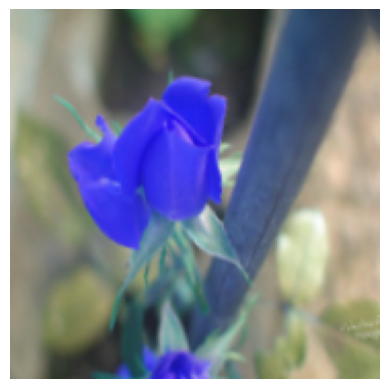

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [28]:
um_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/withDataAugmentation", histogram_freq=1)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10, callbacks=[tb_callback]) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 457ms/step - accuracy: 0.3885 - loss: 1.3829
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 429ms/step - accuracy: 0.6038 - loss: 1.0326
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 423ms/step - accuracy: 0.6371 - loss: 0.9478
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 417ms/step - accuracy: 0.6659 - loss: 0.8678
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 419ms/step - accuracy: 0.7152 - loss: 0.7829
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 428ms/step - accuracy: 0.6986 - loss: 0.7977
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 423ms/step - accuracy: 0.7438 - loss: 0.6743
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 422ms/step - accuracy: 0.7326 - loss: 0.7018
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 420ms/step - accuracy: 0.7565 - loss: 0.6402
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 421ms/step - accuracy: 0.7722 - loss: 0.5949


In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6831 - loss: 0.8016


[0.7719521522521973, 0.7026143670082092]